# EE5601: Representation Learning
Homework-0

### Imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as pimg
import matplotlib.colors
from mpl_toolkits.mplot3d import Axes3D
import random
import os

from IPython.display import display, Math, Latex, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## K-Means Clustering Algorithm

### Distortion Measure
$J = \sum_{n=1}^{N}\sum_{k=1}^{K} r_{nk} \lVert x_{nk} - \mu_{k} \rVert^2$

### Optimisation
$r_{n k}=\left\{\begin{array}{ll}1 & \text { if } k=\arg \min _{j}\left\|\mathbf{x}_{n}-\boldsymbol{\mu}_{j}\right\|^{2} \\ 0 & \text { otherwise. }\end{array}\right.$

$\boldsymbol{\mu}_{k}=\frac{\sum_{n} r_{n k} \mathbf{x}_{n}}{\sum_{n} r_{n k}}$

Optimisations are converted into Matrix Multiplication for Faster Computation.
 
---
**X:** Data Points, Shape:(d,N)\
**k:** No.of Clusters \
**r:** Indicator Random Variables in 1-of-K Representation, Shape:(k,N)\
**Centroids:** Centroids of K-Clusters, Shape:(d,k)\
**Epsilon:** Threshold for Movement of Centroids or Stopping Threshold

In [2]:
class KMeans():
    def __init__(self,k):
        self.k = k
        self.DMeasure = []
    
    def InitiliseCentroids(self,X):
        # Assigning Random k-points as Clusters
        N = X.shape[1]
        Ind = np.random.randint(N,size=(self.k,))
        G = []
        for i in Ind:
            G.append(X[:,i])
            
        return np.transpose(G)
    
    def DistortionMeasure(self,r,X,Centroids):
        # Calculating Distortion Measure
        """
        Distances: Distance of Each Data Point from each Centriod. Shape:(n,k)
        """
        Distances = np.linalg.norm((np.repeat(np.expand_dims(X,axis=1),self.k,axis=1)- np.expand_dims(Centroids,axis=-1)), axis=0)
        J = np.sum(np.multiply(Distances,r))
        
        return J
    
    def ClusterData(self,X,Centroids):
        # Assigning Cluster to Each Point in X
        N = X.shape[1]
        r = np.zeros((self.k,N))
        
        Distances = np.linalg.norm((np.repeat(np.expand_dims(X,axis=1),self.k,axis=1)- np.expand_dims(Centroids,axis=-1)), axis=0)
        Clusters = np.argmin(Distances,axis=0)
        
        # Representing Clusters as 1-of-K Representation
        r = np.transpose(np.eye(self.k)[Clusters])
            
        return r
    
    def CalculateCentroids(self,X,r):
        # Calculating Centroids
        d = X.shape[0]
        Centroids = np.zeros((d,self.k))
        
        Num = np.matmul(X,np.transpose(r))
        Den = np.sum(r,axis=1)
        Centroids = np.divide(Num,np.repeat(np.expand_dims(Den,axis=0),d,axis=0))
        return Centroids
        
        
    def fit(self,X,Epsilon):
        # Iterating over all Data Points
        Centroids = self.InitiliseCentroids(X)
        Loss = []
        e = 0
        
        while 1:
            r = self.ClusterData(X,Centroids)
            J = self.DistortionMeasure(r,X,Centroids)
            NCentroids = self.CalculateCentroids(X,r)
            Diff = np.sum(np.linalg.norm(np.abs(NCentroids-Centroids),axis=1))
            print ("Epoch/Iteration: %-*s  Error in Centroids: %-*s  Distortion Measure: %s" % (6,e,24,Diff,J))
            Loss.append(Diff)
            e += 1
            if Diff < Epsilon:
                break
                
            Centroids = NCentroids

        return Loss,np.argmax(r,axis=0),Centroids
                
    def LossPlot(self,Loss):
        # Plotting Loss
        """
        Loss: Loss Data/ Distortion Measures before Each Iteration
        """
        Loss = np.array(Loss)
        
        plt.figure(figsize=(8,6))
        plt.plot(np.arange(Loss.shape[0]),Loss)
        plt.grid()
        plt.title("Loss")
        plt.xlabel('Epochs/Iterations')
        plt.ylabel('Error in Centroids')
        plt.show()
        
    def PlotClusters(self,X,y):
        # Plotting Clusters
        """
        y: Labels of Data Points
        """
        fig = plt.figure(figsize=(8,8))
        ax = fig.add_subplot(111, projection='3d')
        plt.title("Clustering Data")
        ax.scatter(X[0],X[1],X[2],c=y,cmap='jet')
        ax.set_xlabel("R")
        ax.set_ylabel("G")
        ax.set_zlabel("B")
        plt.ioff()
        plt.show()
        
    def ClusteredOutput(self,X,Labels,Centroids):
        # Returning Data after assigning to Clusters
        """
        Labels: Labels of Data Points
        """
        Y = np.zeros(X.shape)

        for i in range(X.shape[1]):
            Y[:,i] = Centroids[:,Labels[i]]

        return Y

### Reading Image

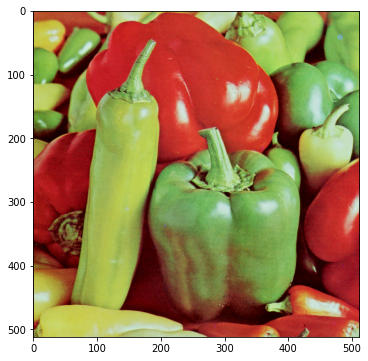

In [3]:
I = pimg.imread('Images/4.2.07.tiff')
plt.figure(figsize=(6,6))
plt.imshow(I)
plt.show()

### Clustering Data

No.of Clusters: k = 7\
Epsilon = 0.0005

Error in Centroids denotes net Movement of Centroids in each Iteration.

In [4]:
X = np.transpose(I.reshape(-1,3))

NClusters = 7
Epsilon = 0.0005

Algorithm = KMeans(NClusters)
Loss,Labels,Centroids = Algorithm.fit(X,Epsilon)
print("---------------------------------------")
print ("Centroids at Convergence:\n", Centroids)

Epoch/Iteration: 0       Error in Centroids: 463.10810166865485        Distortion Measure: 35322336.36443497
Epoch/Iteration: 1       Error in Centroids: 107.0658251406983         Distortion Measure: 9970624.753853647
Epoch/Iteration: 2       Error in Centroids: 55.56000914792058         Distortion Measure: 8150136.259509654
Epoch/Iteration: 3       Error in Centroids: 40.79793237668972         Distortion Measure: 7624399.090165735
Epoch/Iteration: 4       Error in Centroids: 22.70959726189858         Distortion Measure: 7308399.183881837
Epoch/Iteration: 5       Error in Centroids: 13.825582582759482        Distortion Measure: 7188399.78786657
Epoch/Iteration: 6       Error in Centroids: 9.962408385773696         Distortion Measure: 7136738.460387421
Epoch/Iteration: 7       Error in Centroids: 7.580324790362557         Distortion Measure: 7109168.3407126
Epoch/Iteration: 8       Error in Centroids: 6.209458415702179         Distortion Measure: 7092580.016036834
Epoch/Iteration: 9    

### Plotting Clusters
Plotting Clusters with different Colors using cmap of matplotlib

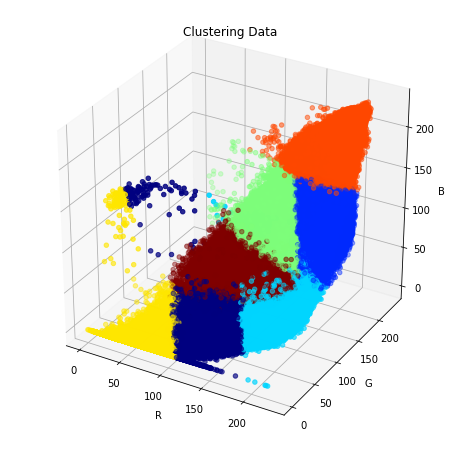

In [5]:
Algorithm.PlotClusters(X,Labels)

### Plotting Loss

Plotting Error in Centroids for Each Iteration. Error in Centroids denotes net Movement of Centroids in each Iteration.

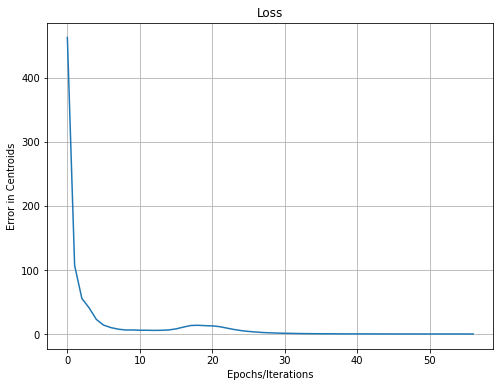

In [6]:
Algorithm.LossPlot(Loss)

### Displaying Image after K-Means

Image after applying K-Means. Data Points are approximated to their corresponding Cluster Centroids.

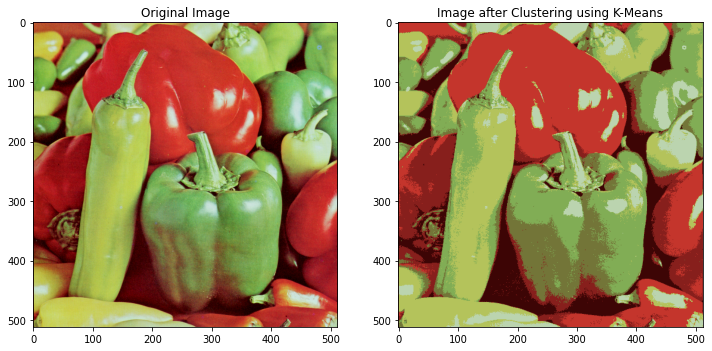

In [7]:
Y = np.transpose(Algorithm.ClusteredOutput(X,Labels,Centroids))
J = np.round(np.reshape(Y,I.shape)).astype(int)

plt.figure(figsize=(12,24))

plt.subplot(1,2,1)
plt.imshow(I)
plt.title('Original Image')

plt.subplot(1,2,2)
plt.imshow(J)
plt.title('Image after Clustering using K-Means')

plt.show()

## Principal Component Analysis

$X = X-\mu_x$. Mean of X is zero across each Dimension **d**.
### Covariance Matrix
$C_{XX} = \frac{1}{N-1}X.X^T$

### Eigen Vectors of Covariance Matrix
$C_{XX} = Q\Lambda Q^T$ \
$\Lambda$: Diagonal Matrix \
$Q$: Matrix Containing Eigen Vectors as Columns

### Projection Matrix
$ Y = P.X $ \
$P = Q^T $ \
$C_{YY} = \frac{1}{N-1}Y.Y^T$

$C_{YY}$ should be Diagonal Matrix as we are trying to decorrelate $Y$.

---

**X:** Data Points, Shape:(d,N)\
**Y:** Projected Data, Shape: (d,N) \
**$C_{XX}$:** CoVariance Matrix of $X$, Shape:(d,d)\
**$C_{YY}$:** CoVariance Matrix of $Y$, Shape:(d,d)

In [8]:
class PCA():
    def __init__(self,X):
        self.X = X - np.mean(X,axis=1,keepdims=True)
        self.N = X.shape[1]
        self.Cxx = self.CoVarianceMatrix()
        self.Q = self.EigenVectors()
        self.P = self.ProjectionMatrix()
    
    def CoVarianceMatrix(self):
        O = np.dot(self.X,self.X.T)
        return O/(self.N - 1)
    
    def EigenVectors(self):
        EigenValues, EigenVectors = np.linalg.eig(self.Cxx)
        return EigenVectors
    
    def ProjectionMatrix(self):
        P = np.transpose(self.Q)
        return P
    
    def fit(self):
        Y = np.dot(self.P,self.X).real
        return Y
    
    def Verify(self,Y):
        # Checks if Cxx is Symmetric Matrix and Cyy is Diagonal Matrix
        print ("Cxx is Symmetric Matrix:",np.all(self.Cxx == self.Cxx.T))
        print ("Cxx = \n", self.Cxx)
        print()
        Cyy = np.round((np.dot(Y,Y.T).real)/(self.N - 1), decimals=4)
        print ("Cyy is Diagonal Matrix and Y is Decorrelated:", np.all(Cyy == np.diag(np.diagonal(Cyy))))
        print ("Cyy = \n", Cyy)

### Reading Image

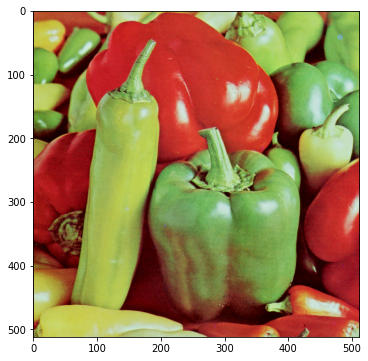

In [9]:
I = pimg.imread('Images/4.2.07.tiff')
plt.figure(figsize=(6,6))
plt.imshow(I)
plt.show()

### Performing PCA and Verifying Results

Verifying:
1. $C_{XX}$ is a Symmetric Matrix or not
2. $C_{YY}$ is a Diagonal Matrix of not

In [10]:
X = np.transpose(I.reshape(-1,3))

Algorithm = PCA(X)
Y = Algorithm.fit()
Algorithm.Verify(Y)

Cxx is Symmetric Matrix: True
Cxx = 
 [[2040.73526296  932.94476624  790.62941793]
 [ 932.94476624 5631.93771601 2784.83454399]
 [ 790.62941793 2784.83454399 1961.19882705]]

Cyy is Diagonal Matrix and Y is Decorrelated: True
Cyy = 
 [[7399.3488   -0.        0.    ]
 [  -0.     1818.7896    0.    ]
 [   0.        0.      415.7334]]


### Cases where PCA Fails!!!...

1. PCA operates on finding the direction of Maximum Variance. If we have High Variance of Data in a non-useful direction it doesn't help in performing PCA.
2. PCA always finds linear Principal Components. It fails in cases where we need Non-Linear Principal Components i.e when Data is not Linearly Correlated.
3. PCA finds Orthogonal Principal Components. If in case we need Non-Orthogonal Principal Components, PCA fails to give results.

## Maximum Likelihood Estimation

### Log-likelihood
Assuming N Random Variables\
$\log L(x;\theta) = \sum_{i=1}^{N} \log f_X(x_i;\theta)$
---

### Binomial Distribution
$f_x(x,p) = {m \choose x}p^x (1-p)^{m-x}$ \
$\mu = mp$ \
$\sigma^2 = mp(1-p)$

**Parameters:**
1. $x_i$ is a Discrete Random Number between $[0,m]$
2. $p^* = \frac{1}{N*m} \sum_{i=1}^{N}x_i$
3. $\mu^* = mp$
4. $\sigma^{2^{*}} = mp(1-p)$
---

### Poisson Distribution
$f_x(\lambda,x) = \frac{\lambda^x e^{-\lambda}}{x!}$ \
$\mu = \lambda$ \
$\sigma^2 = \lambda$

**Parameters:**
1. $x_i$ is a Discrete Random Number between $[0,\infty)$
2. $\lambda^{*} = \frac{1}{N} \sum_{i=1}^{N}x_i$
3. $\mu^* = \lambda$
4. $\sigma^{2^{*}} = \lambda$
---

### Exponential Distribution
$f_x(x,\lambda) = \lambda e^{-\lambda x}$ \
$\mu = \frac{1}{\lambda}$ \
$\sigma^2 = \frac{1}{\lambda^2}$

**Parameters:**
1. $x_i$ is a Continous Random Number between $[0,\infty)$
2. $\lambda^{*} = \frac{N}{\sum_{i=1}^{N}x_i}$
3. $\mu^{*} = \frac{1}{\lambda^*}$
4. $\sigma^{2^{*}} = \frac{1}{\lambda^{*^{2}}}$
---

### Gaussian Distribution
$f_x(x,\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{(x-\mu)^2/{2\sigma^2}}$ \
$\mu = \mu$ \
$\sigma^2 = \sigma^2$

**Parameters:**
1. $x_i$ is a Continous Random Number between $(-\infty,\infty)$
2. $\mu^* = \frac{1}{N} \sum_{i=1}^{N}x_i$
3. $\sigma^{2^{*}} = \frac{1}{N} \sum_{i=1}^{N}(x_i-\mu^*)^2$
---

### Laplacian Distribution
$f_x(x,\mu,b) = \frac{1}{2b}e^{-|x-\mu|/b}$ \
$\mu = \mu$ \
$\sigma^2 = 2b^2$

**Parameters:**
1. $x_i$ is a Continous Random Number between $(-\infty,\infty)$
2. $\sum_{i=1}^{N} sgn(x_i - \mu) = 0$. This solves to $\mu^* = Median(x_1,x_2,x_3,...x_N)$
3. $b^* = \frac{1}{N} \sum_{i=1}^{N}|x_i - \mu^*|$
4. $\sigma^{2^{*}} = 2{b^{*}}^{2}$

---

**X: Input Data \
Y: Estimated Data \
TrueParameters: Parameters for Input Distribution\
EstimatedParameters: Estimated Parameters of Input Distribution**

In [11]:
class MLE():
    def __init__(self):
        self.N = None
        self.Distribution = None
        self.TrueParameters = None
        self.X = None
        self.EstimatedParameters = None
        self.Y = None
    
    def GenerateData(self,Parameters):
        # Generates Data with given Parameters for a Distribution
        Data = []
        if self.Distribution == 'Binomial':
            m = Parameters[0]
            p = Parameters[1]
            Data = np.random.binomial(m,p,self.N)
            
        elif self.Distribution == 'Poisson':
            lam = Parameters[0]
            Data = np.random.poisson(lam,self.N)
            
        elif self.Distribution == 'Exponential':
            lam = Parameters[0]
            Data = np.random.exponential(1.0/lam,self.N)
            
        elif self.Distribution == 'Gaussian':
            mu = Parameters[0]
            Var = Parameters[1]
            Data = np.random.normal(mu, np.sqrt(Var), self.N)
        
        elif self.Distribution == 'Laplacian':
            mu = Parameters[0]
            b = Parameters[1]
            Data = np.random.laplace(mu, b, self.N)
            
        return Data
        
    def fit(self,N,Distribution,TrueParameters):
        # Initializes: Generates Data with gives Parameters and Estimates Parameters from Generated Data
        # Generating Data from Estimated Parameters
        self.TrueParameters = TrueParameters
        self.Distribution = Distribution
        self.N = N
        self.X = self.GenerateData(TrueParameters)
        self.EstimateParameters()
        self.Y = self.GenerateData(self.EstimatedParameters)
        
        print ("N: %-*s  True-Parameters: %-*s  Estimated-Parameters: %s" % (4,self.N,8,tuple(self.TrueParameters),tuple(self.EstimatedParameters)))
         
    def EstimateParameters(self):
        # Estimates Parameters from Generated Data
        Parameters = []
        
        if self.Distribution == 'Binomial':
            # 'm' is not a Estimated Parameter. It will be provided
            m = self.TrueParameters[0]
            p = np.sum(self.X)/(m*self.N)
            Parameters = [m,p]
            
        elif self.Distribution == 'Poisson':
            lam = np.sum(self.X)/(self.N)
            Parameters = [lam]
            
        elif self.Distribution == 'Exponential':
            lam = (self.N)/np.sum(self.X)
            Parameters = [lam]
            
        elif self.Distribution == 'Gaussian':
            mu = np.sum(self.X)/(self.N)
            Var = np.sum(np.square(self.X - mu))/(self.N)
            Parameters = [mu,Var]
        
        elif self.Distribution == 'Laplacian':
            mu = np.median(self.X)
            b = np.sum(np.abs(self.X - mu))/(self.N)
            Parameters = [mu,b]
            
        self.EstimatedParameters = Parameters
            
    def PlotData(self):
        # Plots Data using True Parameters and Estimated Parameters
        plt.figure(figsize=(14,6))
        plt.hist(self.X,color='red',label='Data from True Parameters')
        plt.hist(self.Y,color='blue',label='Data from Estimated Parameters')
        plt.title(self.Distribution + " Distribution")
        plt.legend(bbox_to_anchor=(1, 1), loc='upper left', borderaxespad=0.)
        plt.grid()
        plt.show()
        
        plt.figure(figsize=(14,6))
        
        plt.subplot(1,2,1)
        plt.hist(self.X,color='red',label='Data from True Parameters')
        plt.title("Data from True Parameters")
        plt.grid()
        
        plt.subplot(1,2,2)
        plt.hist(self.Y,color='blue',label='Data from Estimated Parameters')
        plt.title("Data from Estimated Parameters")
        plt.grid()
        
        plt.show()

### Binomial Distribution

N: 500   True-Parameters: (10, 0.5)  Estimated-Parameters: (10, 0.4938)


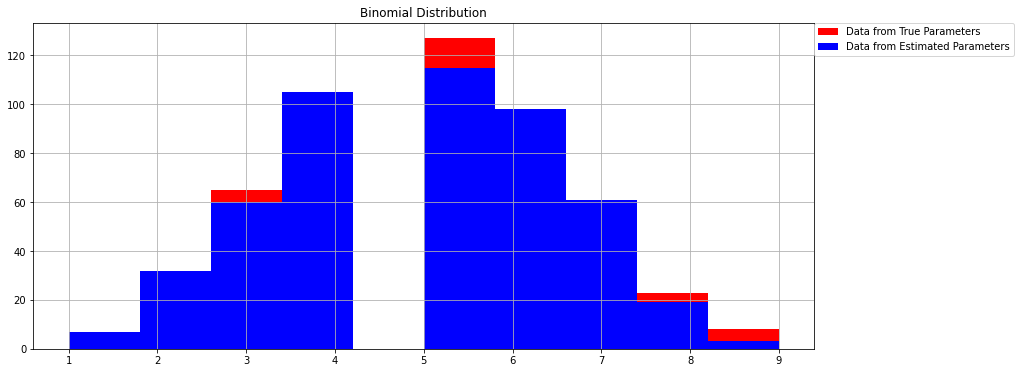

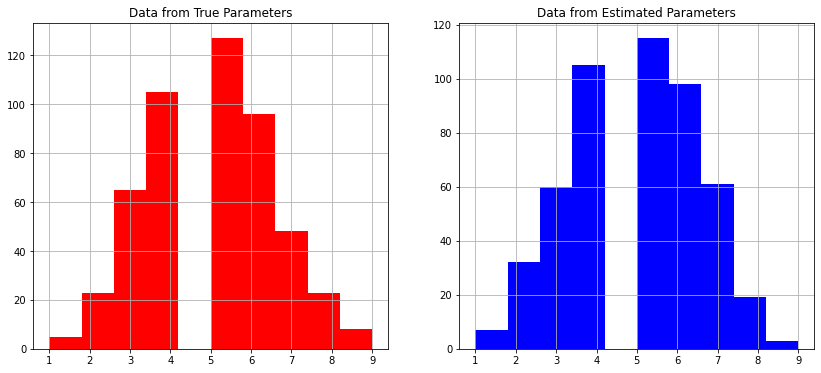


--------------------

N: 1000  True-Parameters: (10, 0.5)  Estimated-Parameters: (10, 0.4916)


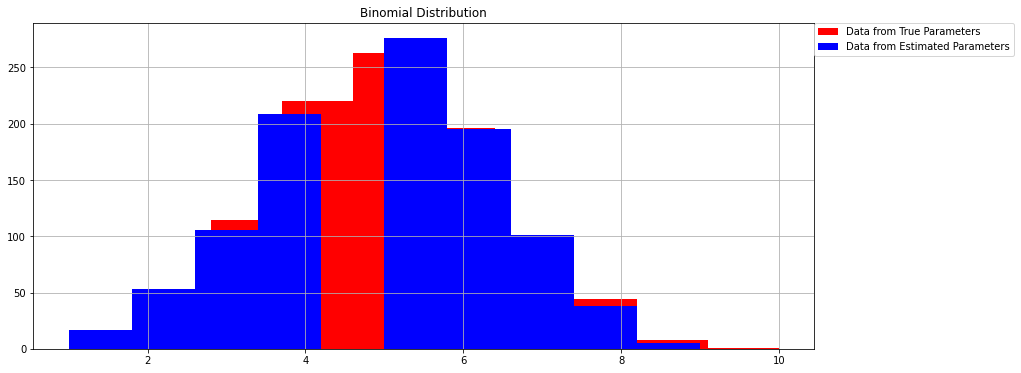

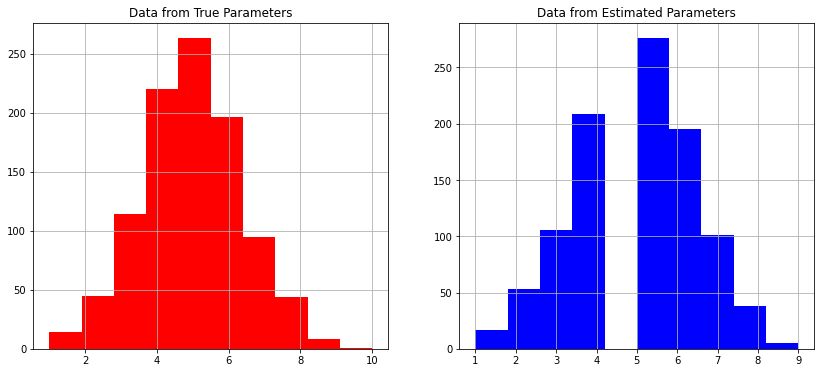

In [12]:
Bino = MLE()

Bino.fit(500,"Binomial",[10,0.5])
Bino.PlotData()
print()
print("--------------------")
print()
Bino.fit(1000,"Binomial",[10,0.5])
Bino.PlotData()

### Poisson Distribution

N: 500   True-Parameters: (0.6,)    Estimated-Parameters: (0.636,)


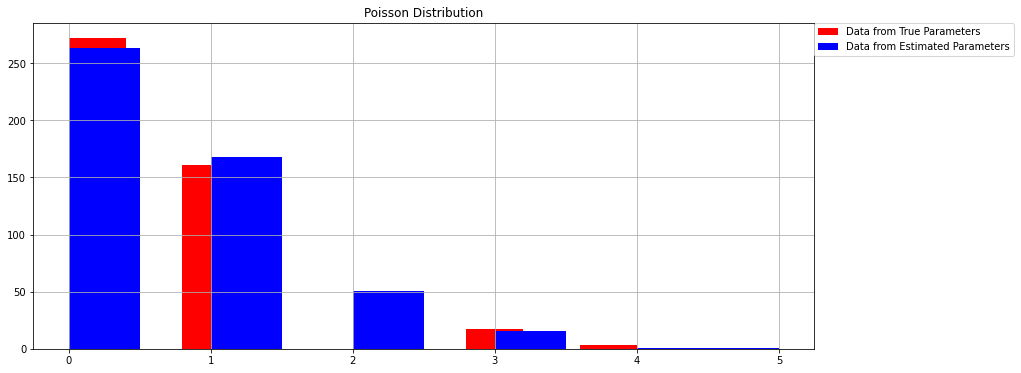

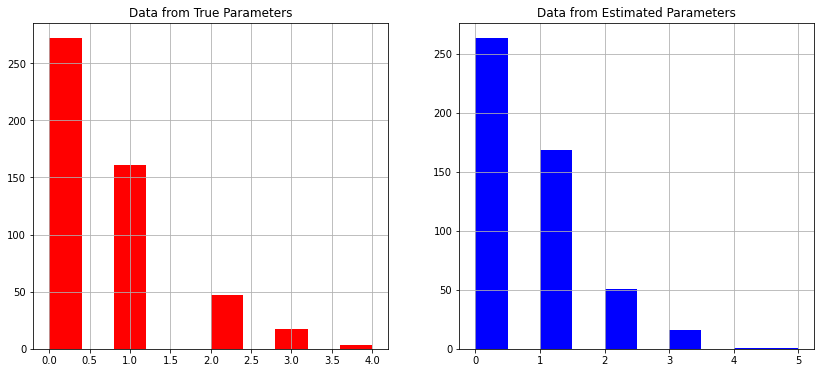


--------------------

N: 1000  True-Parameters: (0.6,)    Estimated-Parameters: (0.572,)


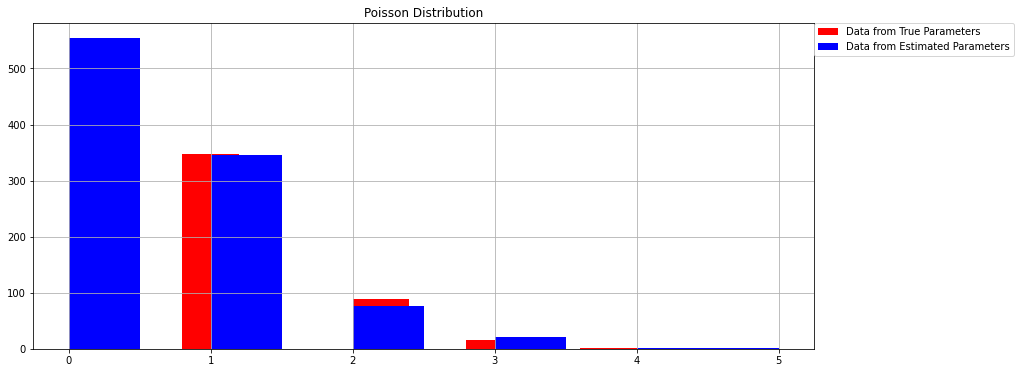

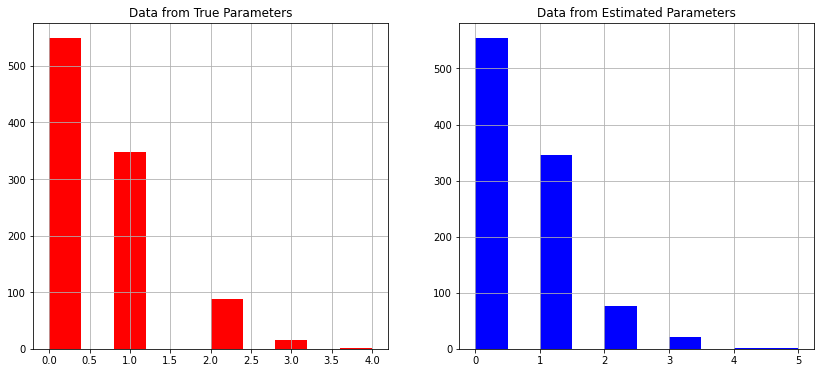

In [13]:
Pois = MLE()

Pois.fit(500,"Poisson",[0.6])
Pois.PlotData()
print()
print("--------------------")
print()
Pois.fit(1000,"Poisson",[0.6])
Pois.PlotData()

### Exponential Distribution

N: 500   True-Parameters: (0.6,)    Estimated-Parameters: (0.6676715654317855,)


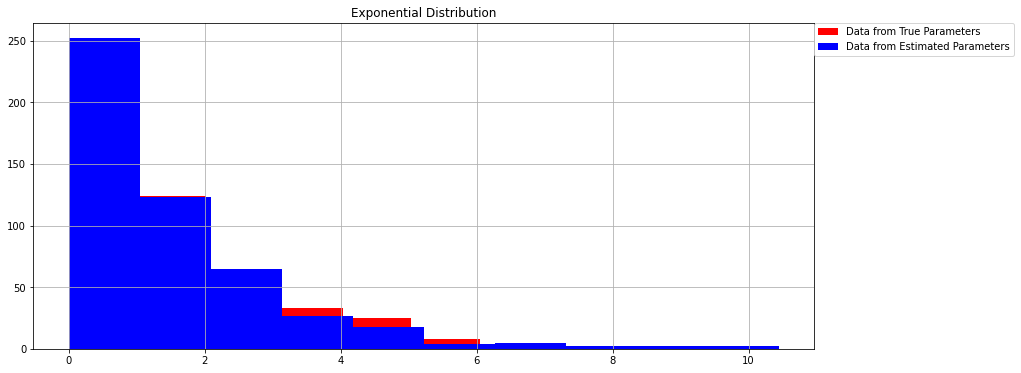

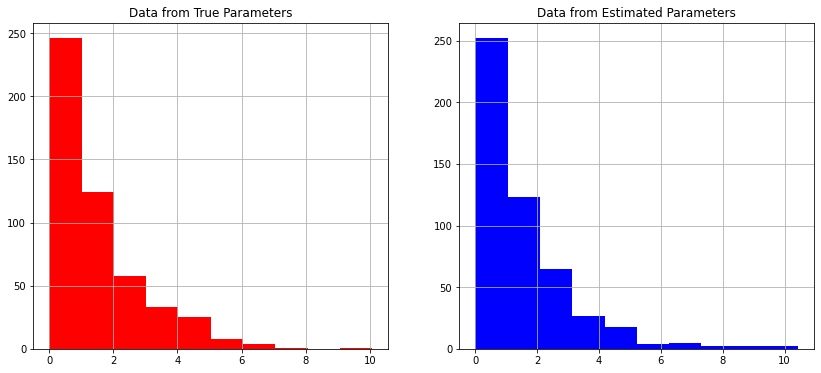


--------------------

N: 1000  True-Parameters: (0.6,)    Estimated-Parameters: (0.5958265527963906,)


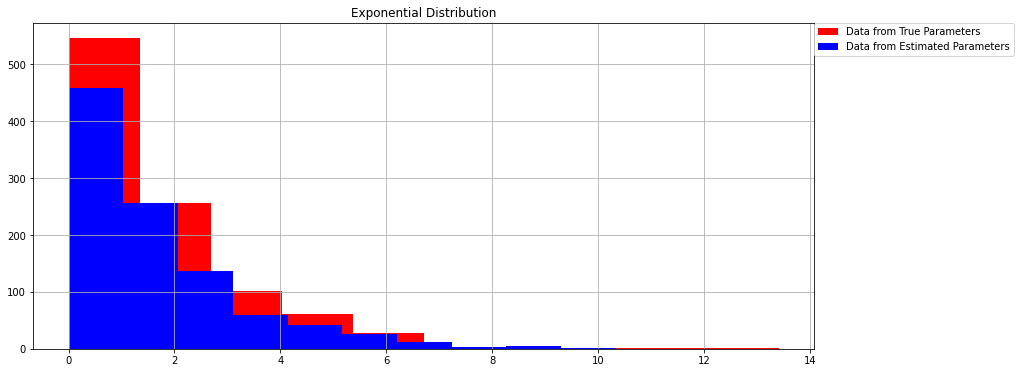

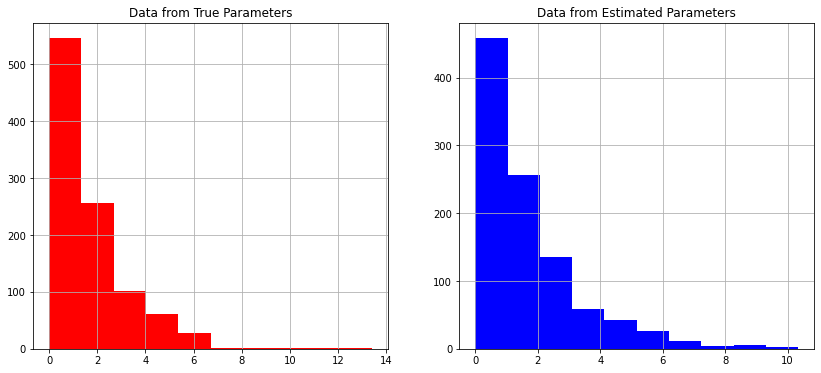

In [14]:
Expo = MLE()

Expo.fit(500,"Exponential",[0.6])
Expo.PlotData()
print()
print("--------------------")
print()
Expo.fit(1000,"Exponential",[0.6])
Expo.PlotData()

### Gaussian Distribution

N: 500   True-Parameters: (0.6, 3)  Estimated-Parameters: (0.7246665230295727, 3.1237007137866604)


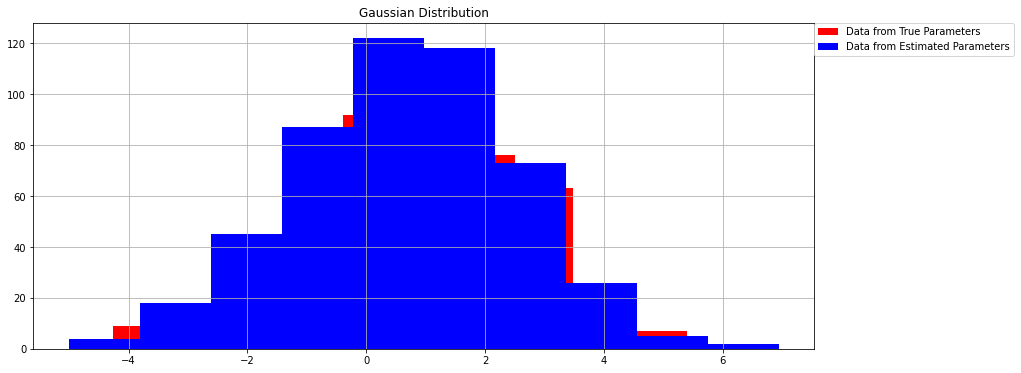

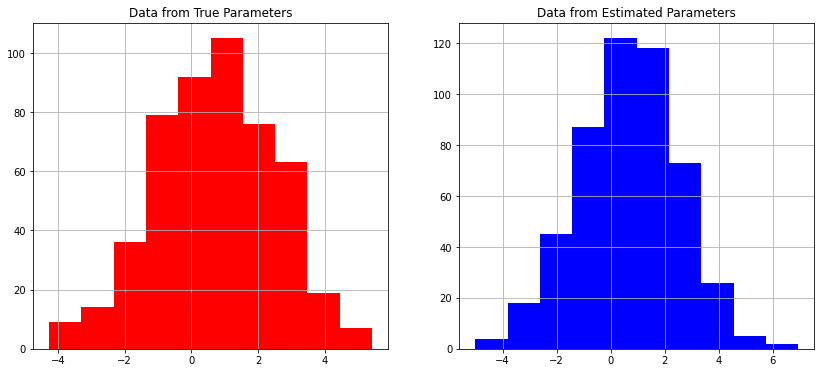


--------------------

N: 1000  True-Parameters: (0.6, 3)  Estimated-Parameters: (0.5917589608935054, 3.2448346989075993)


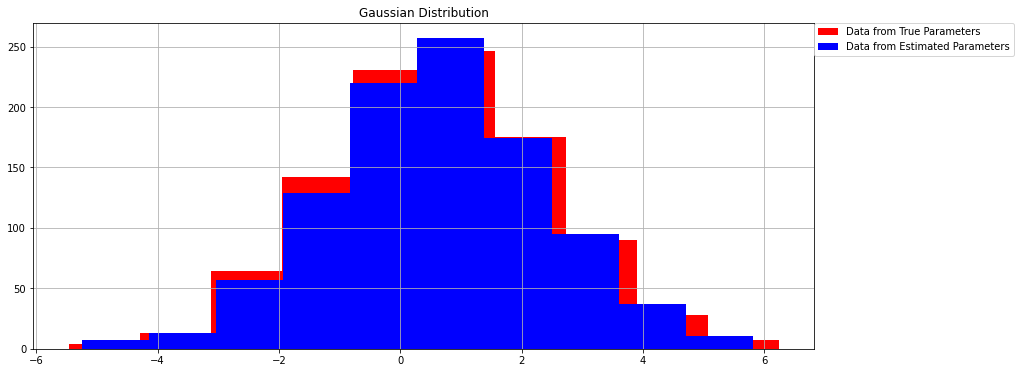

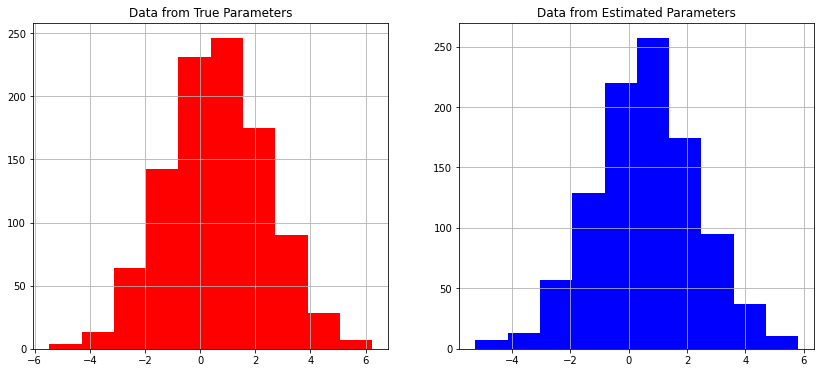

In [15]:
Gaus = MLE()

Gaus.fit(500,"Gaussian",[0.6,3])
Gaus.PlotData()
print()
print("--------------------")
print()
Gaus.fit(1000,"Gaussian",[0.6,3])
Gaus.PlotData()

### Laplacian Distribution

N: 500   True-Parameters: (0.6, 3)  Estimated-Parameters: (0.5969303199565834, 2.8731443919560045)


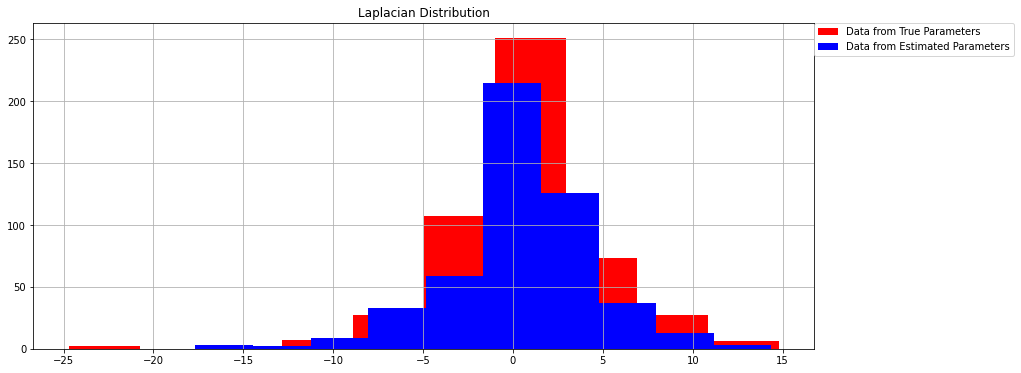

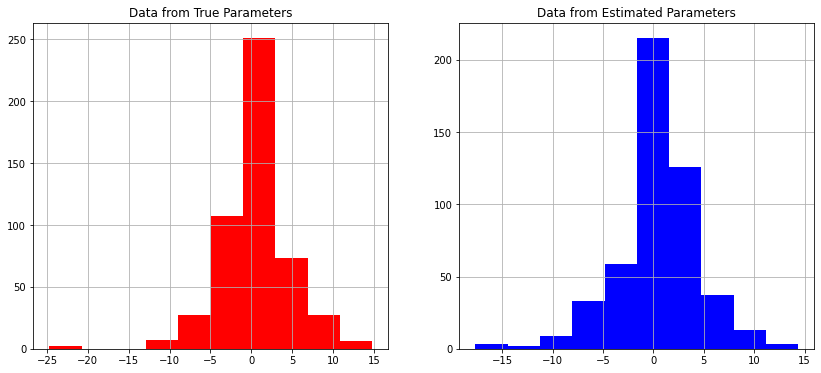


--------------------

N: 1000  True-Parameters: (0.6, 3)  Estimated-Parameters: (0.49876040742565186, 3.072835830249903)


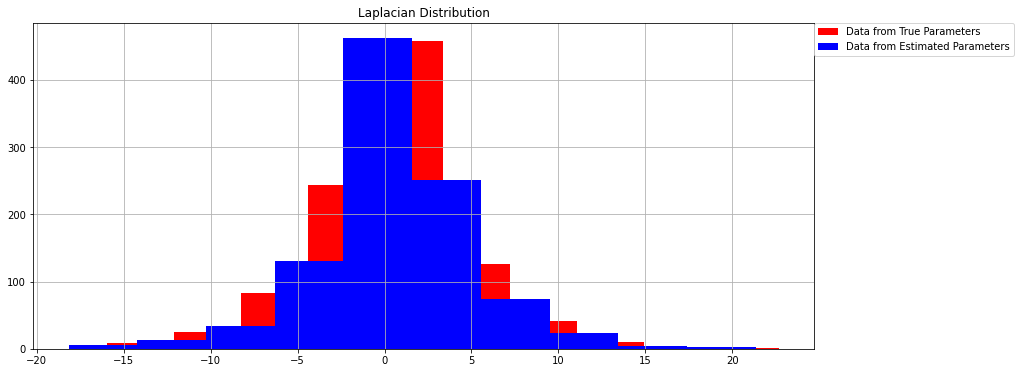

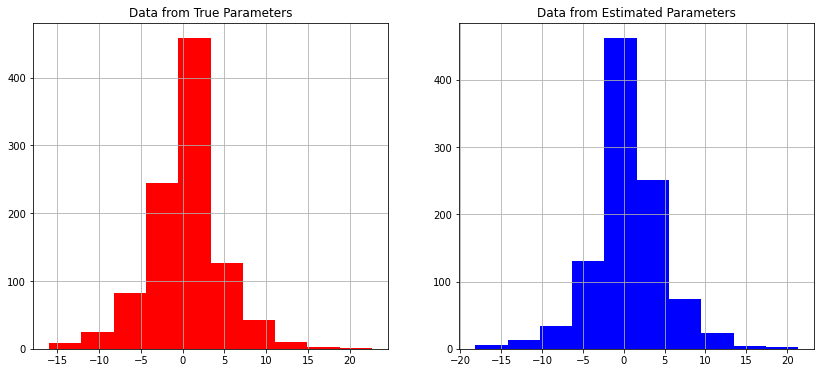

In [16]:
Lapl = MLE()

Lapl.fit(500,"Laplacian",[0.6,3])
Lapl.PlotData()
print()
print("--------------------")
print()
Lapl.fit(1000,"Laplacian",[0.6,3])
Lapl.PlotData()

As N increases Estimated Parameters converge to True Parameters